# 1-Análise descritiva :
## Abrir os dados
## Dados nulos 0, apenas na coluna VALOR QUE VEIO VAZIA
## Dados duplicados 4

## O que cada tabela significa ?
### ITEM_PEDIDO-_2_ _.xlsx: É o id da compra, id do item e a quantidade vendida
### ITENS-_3___ id do item e o preço, essa tabela veio sem nome nas colunas, presume-se que é o preço
### PEDIDO-_1__ id do pedido, data da venda e valor da venda que veio vazio


## Quais produtos vendem mais em quantidade ? 
### Item D 251

## Qual produto gerou mais receita ? 
### Item D

## Qual mes gerou mais receita ? 
### 7, destaque ao item D

## Qual semana gerou mais receita ? 
### 29, destaque ao item D

## Qual dia da semana gerou mais receita ? 
### Domingo, destaque ao item D

## Como os itens se comportam nas compras ?
### Todos os itens possuem a mesma mediana de 3 pedidos por venda

## Como é a distrbuição dos valores de cada pedido ?
### Em relação ao preço é um curva não normal, tem muita calda, embora a moda, média e a mediana estão próximas

## Tendências de consumo: Podemos identificar quais itens têm tendência de aumento ou diminuição nas vendas ao longo do tempo.

## Qual o range de pedidos diários ?
### Entre 1 até 5 pedidos

## Os dados realmente mostram que as vendas estão aumentando ?
### Visualmente em série temporal não

## Quais as combinações mais pedidas ?
###	(item B, item D)	28
###	(item A, item C)	27
###	(item C, item D)	26
###	(item B, item C)	22
###	(item A, item D)	22
### Sugestão de bombo ou descontos

## Qual a correlação entre a receita e a média diária de vendas ?
### Corerlação muito leve e oposta por spearman -0.04

## A média dos pedidos e da receita diária é estacionária


# Obs.:
## Os dados estão em formato .xlsx e não .csv como informados no texto 
## A tabela PEDIDO-_1_.xlsx vaeio com idex qquebrado, ou seja faltam linhas
## A tabela ITENS-_3___.xlsx veio sem nomes nas colunas
## Não tem muitos dados para aplicar um modelo robusto, a escoha do modelo vai ser o que performa por menores linhas
## Utilizar número da semana e número do mês no modelo

In [210]:
import pandas as pd

df_item_pedido = pd.read_excel("/Users/marcobispo/Documents/desafio_datalakers-/ITEM_PEDIDO-_2_ _.xlsx")
if 'Unnamed: 0' in df_item_pedido.columns:
    df_item_pedido = df_item_pedido.drop(columns=['Unnamed: 0'])
display(df_item_pedido.head(5))
display(df_item_pedido.info())

df_item_3 = pd.read_excel("/Users/marcobispo/Documents/desafio_datalakers-/ITENS-_3___.xlsx")
df_item_3 = df_item_3.rename(columns={
    'Unnamed: 0':'ID_ITEM',	
    0:'PRECO'
})
display(df_item_3.head(5))
display(df_item_3.info())

df_pedido_1 = pd.read_excel("/Users/marcobispo/Documents/desafio_datalakers-/PEDIDO-_1__.xlsx")
if 'Unnamed: 0' in df_pedido_1.columns:
    df_pedido_1 = df_pedido_1.drop(columns=['Unnamed: 0'])
display(df_pedido_1.head(5))
display(df_pedido_1.info())

,ID_PEDIDO,ID_ITEM,QUANTIDADE
0,120210601,item C,4
1,220210601,item A,3
2,320210604,item C,1
3,420210604,item B,4
4,420210604,item C,2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295 entries, 0 to 294
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID_PEDIDO   295 non-null    int64 
 1   ID_ITEM     295 non-null    object
 2   QUANTIDADE  295 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 7.0+ KB


None

,ID_ITEM,PRECO
0,item A,10
1,item B,15
2,item C,20
3,item D,25


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   ID_ITEM  4 non-null      object
 1   PRECO    4 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 192.0+ bytes


None

,ID_PEDIDO,DATA,VALOR_TOTAL
0,120210601,2021-06-01,NaN
1,220210601,2021-06-01,NaN
2,320210604,2021-06-04,NaN
3,420210604,2021-06-04,NaN
4,520210604,2021-06-04,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID_PEDIDO    181 non-null    int64  
 1   DATA         181 non-null    object 
 2   VALOR_TOTAL  0 non-null      float64
dtypes: float64(1), int64(1), object(1)
memory usage: 4.4+ KB


None

In [211]:
df_join1 = df_item_pedido.merge(df_item_3, on='ID_ITEM', how='left')
df_join2 = df_join1.merge(df_pedido_1, on='ID_PEDIDO', how='left')
df_join2['VALOR_TOTAL'] = df_join2['QUANTIDADE'] * df_join2["PRECO"]
df = df_join2

traducao_dias = {
    'Monday': 'Segunda-feira',
    'Tuesday': 'Terça-feira',
    'Wednesday': 'Quarta-feira',
    'Thursday': 'Quinta-feira',
    'Friday': 'Sexta-feira',
    'Saturday': 'Sábado',
    'Sunday': 'Domingo'
}

df['DATA'] = pd.to_datetime(df['DATA'], format='%Y-%m-%d')
df.sort_values(by='DATA')
df['DIA DA SEMANA'] = df['DATA'].dt.day_name()
df['DIA DA SEMANA'] = df['DIA DA SEMANA'].replace(traducao_dias)
df["NUMERO DA SEMANA"] = df['DATA'].dt.isocalendar().week
df['NUMERO DO MES'] = df['DATA'].dt.month
df['MES'] = df['DATA']
total_duplicados = df.duplicated().sum()
print("Total de duplicados:", total_duplicados)
df

Total de duplicados: 4


,ID_PEDIDO,ID_ITEM,QUANTIDADE,PRECO,DATA,VALOR_TOTAL,DIA DA SEMANA,NUMERO DA SEMANA,NUMERO DO MES,MES
0,120210601,item C,4,20,2021-06-01,80,Terça-feira,22,6,2021-06-01
1,220210601,item A,3,10,2021-06-01,30,Terça-feira,22,6,2021-06-01
2,320210604,item C,1,20,2021-06-04,20,Sexta-feira,22,6,2021-06-04
3,420210604,item B,4,15,2021-06-04,60,Sexta-feira,22,6,2021-06-04
4,420210604,item C,2,20,2021-06-04,40,Sexta-feira,22,6,2021-06-04
...,...,...,...,...,...,...,...,...,...,...
290,14520210831,item C,5,20,2021-08-31,100,Terça-feira,35,8,2021-08-31
291,14520210831,item A,3,10,2021-08-31,30,Terça-feira,35,8,2021-08-31
292,14620210901,item D,2,25,2021-09-01,50,Quarta-feira,35,9,2021-09-01
293,14720210901,item A,1,10,2021-09-01,10,Quarta-feira,35,9,2021-09-01


In [212]:
df[["VALOR_TOTAL","ID_ITEM","NUMERO DO MES"]]

,VALOR_TOTAL,ID_ITEM,NUMERO DO MES
0,80,item C,6
1,30,item A,6
2,20,item C,6
3,60,item B,6
4,40,item C,6
...,...,...,...
290,100,item C,8
291,30,item A,8
292,50,item D,9
293,10,item A,9


/var/folders/gj/tzd3lx9s2rx7vzm6v94rp4zw0000gn/T/ipykernel_71712/822825324.py:17: FutureWarning:

The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior



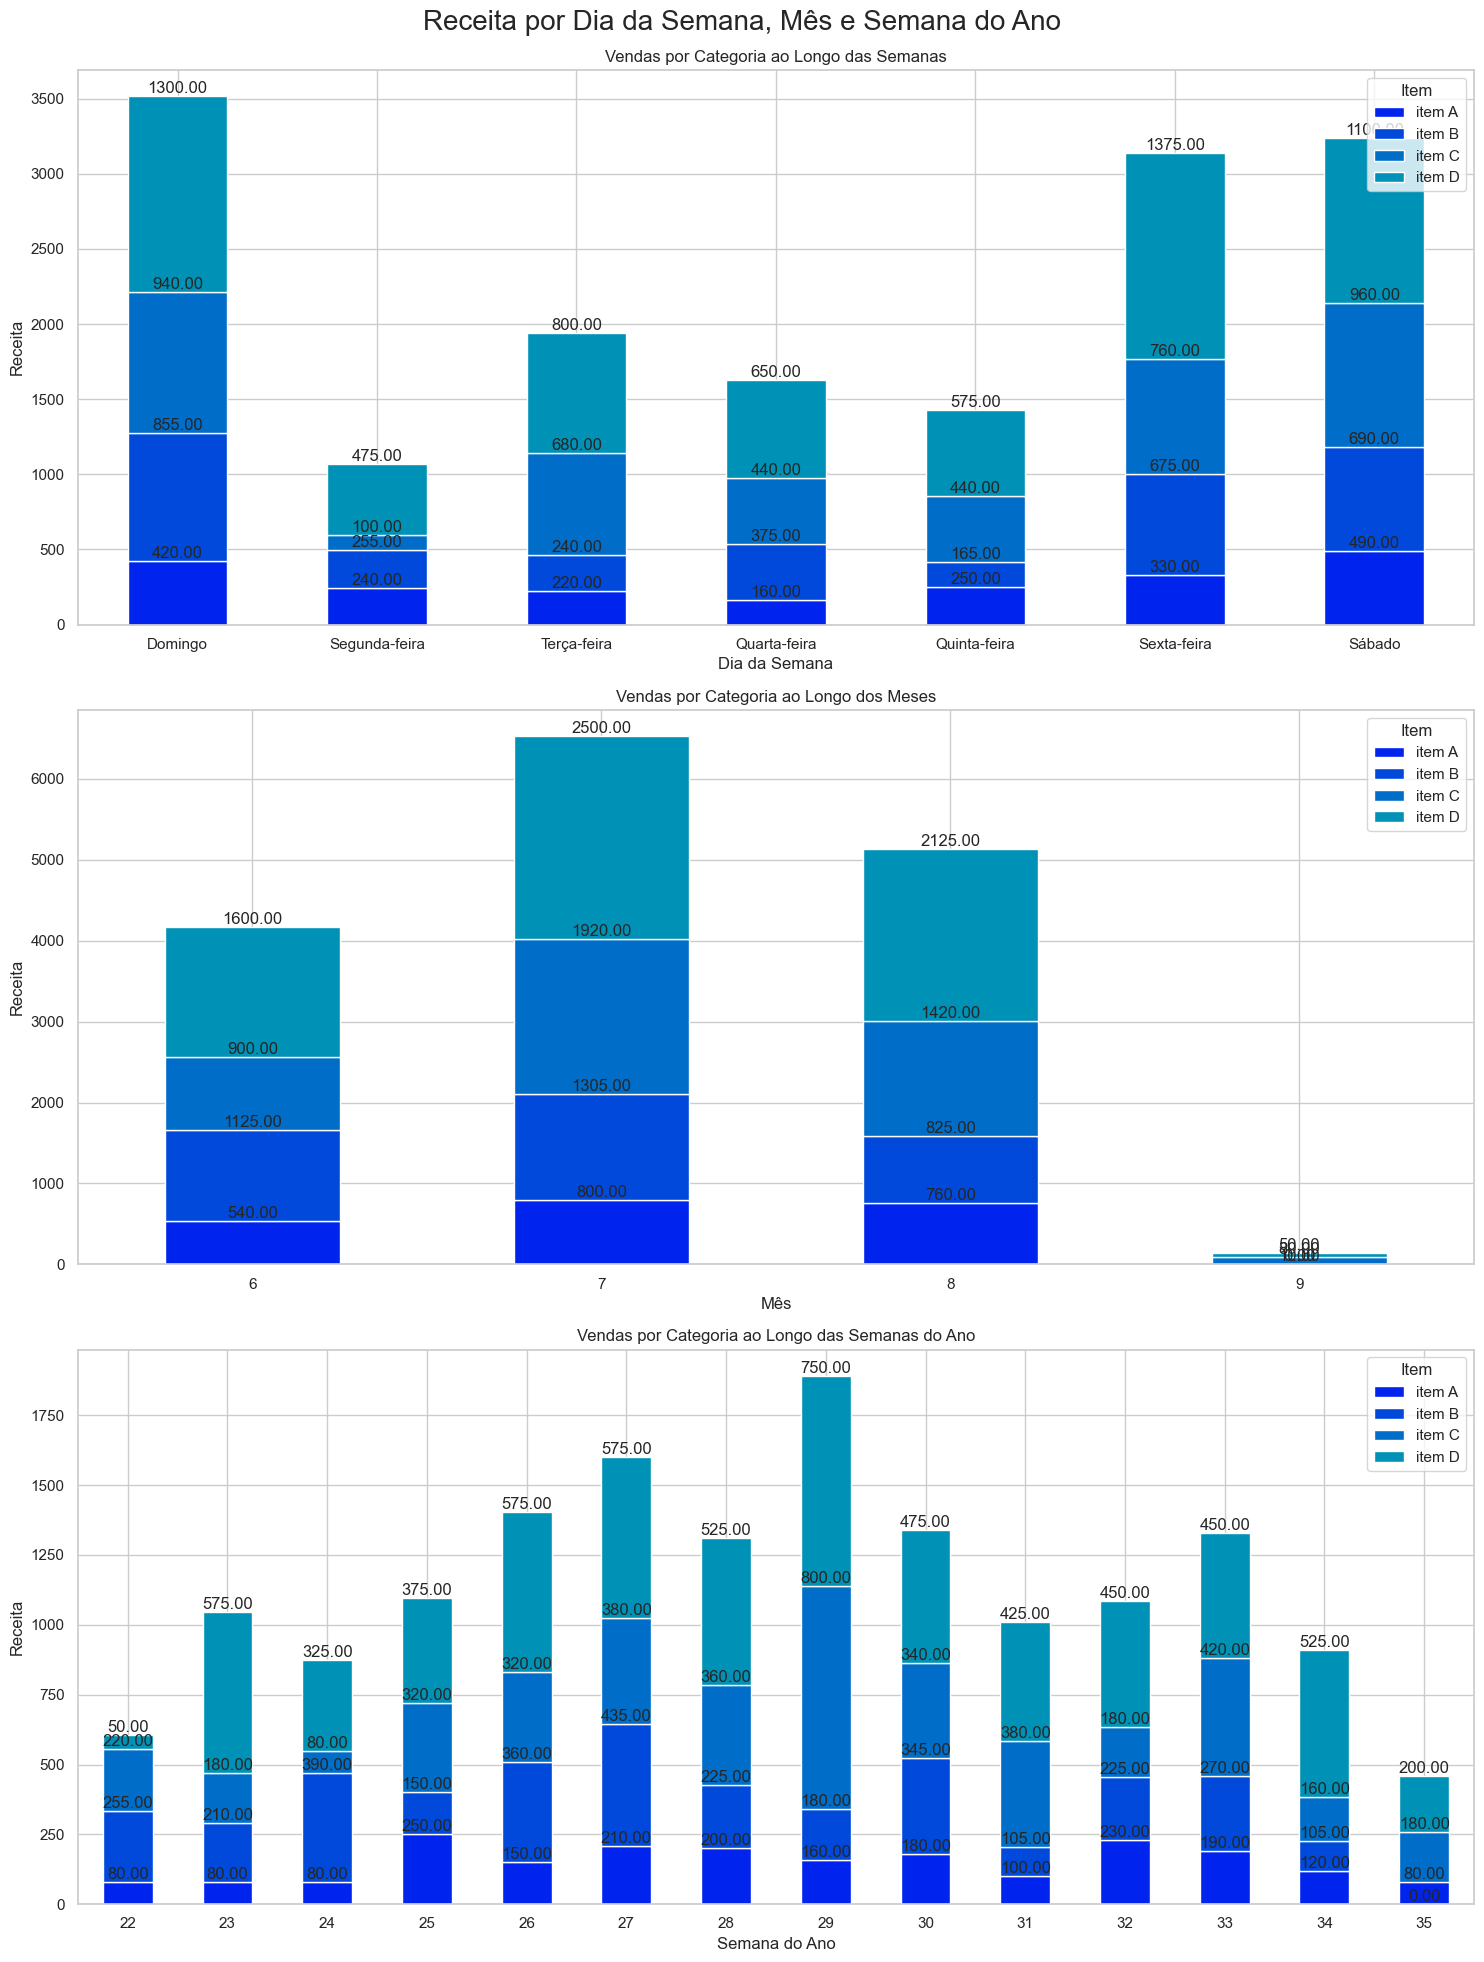

In [213]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supondo que 'df' seja o seu DataFrame com os dados

# Defina os dias da semana na ordem desejada
dias_da_semana = ['Domingo', 'Segunda-feira', 'Terça-feira', 'Quarta-feira', 'Quinta-feira', 'Sexta-feira', 'Sábado']
sns.set_palette(sns.color_palette("winter"))
# Crie a figura com subplots
plt.figure(figsize=(15, 20))

# Subplot 1: Vendas por categoria ao longo das semanas
plt.subplot(3, 1, 1)
df['DIA DA SEMANA'] = pd.Categorical(df['DIA DA SEMANA'], categories=dias_da_semana, ordered=True)
total_por_semana = df.groupby(['DIA DA SEMANA', 'ID_ITEM'], observed=False)['VALOR_TOTAL'].sum().reset_index().sort_values(by='VALOR_TOTAL')
total_por_semana_pivot = total_por_semana.pivot_table(index='DIA DA SEMANA', columns='ID_ITEM', values='VALOR_TOTAL', aggfunc='sum', fill_value=0)
bars = total_por_semana_pivot.plot(kind='bar', stacked=True, ax=plt.gca())
plt.xlabel('Dia da Semana')
plt.xticks(rotation=0)
plt.ylabel('Receita')
plt.title('Vendas por Categoria ao Longo das Semanas')
plt.legend(title='Item', loc='upper right')

# Adicionar valores nas barras
for bar in bars.patches:
    # Posição x e y da barra
    x = bar.get_x() + bar.get_width() / 2
    y = bar.get_y() + bar.get_height()
    # Formatar o valor como desejado (nesse caso, como float com 2 casas decimais)
    label = '{:.2f}'.format(bar.get_height())
    # Adicionar o texto no local desejado com alguma compensação y
    plt.annotate(label, (x, y), ha='center', va='bottom')

# Subplot 2: Vendas por categoria ao longo dos meses
plt.subplot(3, 1, 2)
total_por_mes = df.groupby(['NUMERO DO MES', 'ID_ITEM'])['VALOR_TOTAL'].sum().reset_index().sort_values(by='VALOR_TOTAL')
total_por_mes_pivot = total_por_mes.pivot_table(index='NUMERO DO MES', columns='ID_ITEM', values='VALOR_TOTAL', aggfunc='sum', fill_value=0)
bars = total_por_mes_pivot.plot(kind='bar', stacked=True, ax=plt.gca())
plt.xlabel('Mês')
plt.xticks(rotation=0)
plt.ylabel('Receita')
plt.title('Vendas por Categoria ao Longo dos Meses')
plt.legend(title='Item', loc='upper right')

# Adicionar valores nas barras
for bar in bars.patches:
    x = bar.get_x() + bar.get_width() / 2
    y = bar.get_y() + bar.get_height()
    label = '{:.2f}'.format(bar.get_height())
    plt.annotate(label, (x, y), ha='center', va='bottom')

# Subplot 3: Vendas por categoria ao longo das semanas do ano
plt.subplot(3, 1, 3)
total_por_semana_ano = df.groupby(['NUMERO DA SEMANA', 'ID_ITEM'])['VALOR_TOTAL'].sum().reset_index().sort_values(by='VALOR_TOTAL')
total_por_semana_ano_pivot = total_por_semana_ano.pivot_table(index='NUMERO DA SEMANA', columns='ID_ITEM', values='VALOR_TOTAL', aggfunc='sum', fill_value=0)
bars = total_por_semana_ano_pivot.plot(kind='bar', stacked=True, ax=plt.gca())
plt.xlabel('Semana do Ano')
plt.ylabel('Receita')
plt.title('Vendas por Categoria ao Longo das Semanas do Ano')
plt.legend(title='Item', loc='upper right')
plt.xticks(rotation=0)

# Adicionar valores nas barras
for bar in bars.patches:
    x = bar.get_x() + bar.get_width() / 2
    y = bar.get_y() + bar.get_height()
    label = '{:.2f}'.format(bar.get_height())
    plt.annotate(label, (x, y), ha='center', va='bottom')

# Título geral para toda a figura
plt.suptitle("Receita por Dia da Semana, Mês e Semana do Ano", fontsize=20)

# Ajuste de layout
plt.tight_layout()

# Exibir a figura
plt.subplots_adjust(top=0.95)
plt.show()

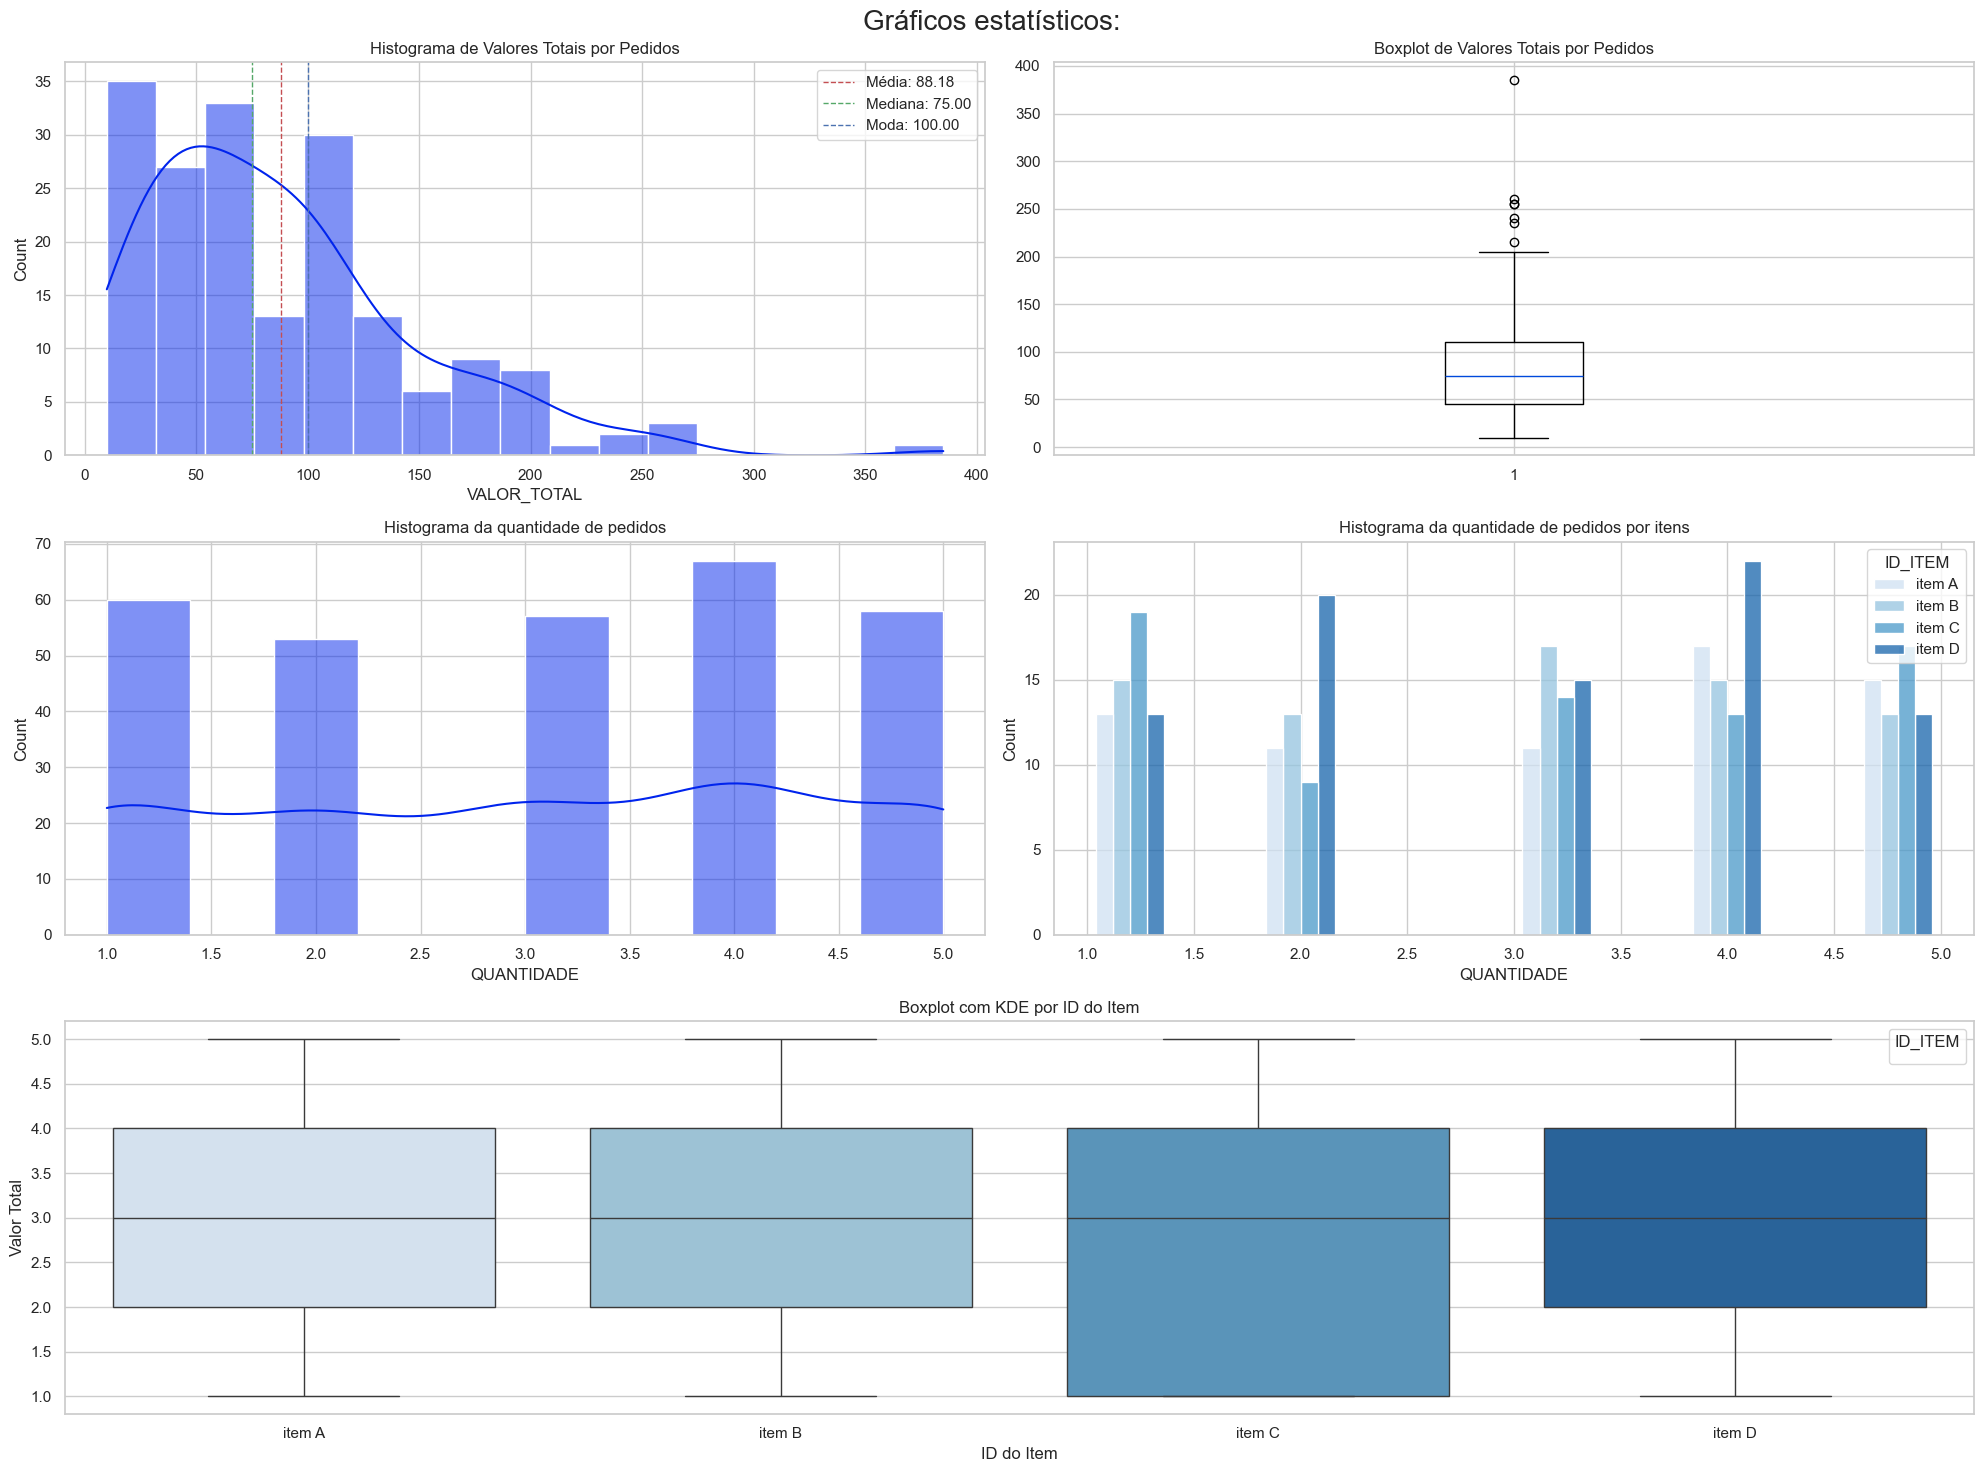

In [214]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_palette(sns.color_palette("winter"))

# Ordenando os dados pelo ID_ITEM
df = df.sort_values(by="ID_ITEM")

# Criando a figura principal com tamanho definido
plt.figure(figsize=(20, 15))

# Primeiro subplot: Histograma de Valores Totais por Pedidos
plt.subplot(3, 2, 1)
df_pedido = df.groupby('ID_PEDIDO')['VALOR_TOTAL'].sum().reset_index()
sns.histplot(data=df_pedido, x="VALOR_TOTAL", kde=True)
plt.title('Histograma de Valores Totais por Pedidos')
media = df_pedido['VALOR_TOTAL'].mean()
mediana = df_pedido['VALOR_TOTAL'].median()
moda = df_pedido['VALOR_TOTAL'].mode().iloc[0]
plt.axvline(media, color='r', linestyle='dashed', linewidth=1, label=f'Média: {media:.2f}')
plt.axvline(mediana, color='g', linestyle='dashed', linewidth=1, label=f'Mediana: {mediana:.2f}')
plt.axvline(moda, color='b', linestyle='dashed', linewidth=1, label=f'Moda: {moda:.2f}')
plt.legend()

# Segundo subplot: Boxplot de Valores Totais por Pedidos
plt.subplot(3, 2, 2)
plt.boxplot(data=df_pedido, x="VALOR_TOTAL")
plt.title('Boxplot de Valores Totais por Pedidos')

# Terceiro subplot: Histograma da quantidade de pedidos
plt.subplot(3, 2, 3)
sns.histplot(data=df, x="QUANTIDADE", kde=True)
plt.title('Histograma da quantidade de pedidos')

# Quarto subplot: Histograma da quantidade de pedidos por itens
plt.subplot(3, 2, 4)
sns.histplot(data=df, x="QUANTIDADE", hue="ID_ITEM", multiple="dodge", shrink=.8, palette='Blues')
plt.title('Histograma da quantidade de pedidos por itens')

# Quinto subplot: Boxplot com KDE por ID do Item
plt.subplot(3, 1, 3)
sns.boxplot(data=df, x='ID_ITEM', y='QUANTIDADE', hue='ID_ITEM', palette='Blues', legend=False)
sns.kdeplot(data=df[df['ID_ITEM'] == 'A']['QUANTIDADE'], color='blue', label='A', linewidth=2)
sns.kdeplot(data=df[df['ID_ITEM'] == 'B']['QUANTIDADE'], color='lightblue', label='B', linewidth=2)
sns.kdeplot(data=df[df['ID_ITEM'] == 'C']['QUANTIDADE'], color='skyblue', label='C', linewidth=2)
plt.xlabel('ID do Item')
plt.ylabel('Valor Total')
plt.title('Boxplot com KDE por ID do Item')
plt.legend(title='ID_ITEM')

# Mostrando a figura completa
plt.suptitle("Gráficos estatísticos:", fontsize=20)
plt.subplots_adjust(top=0.92)
plt.tight_layout()
plt.show()


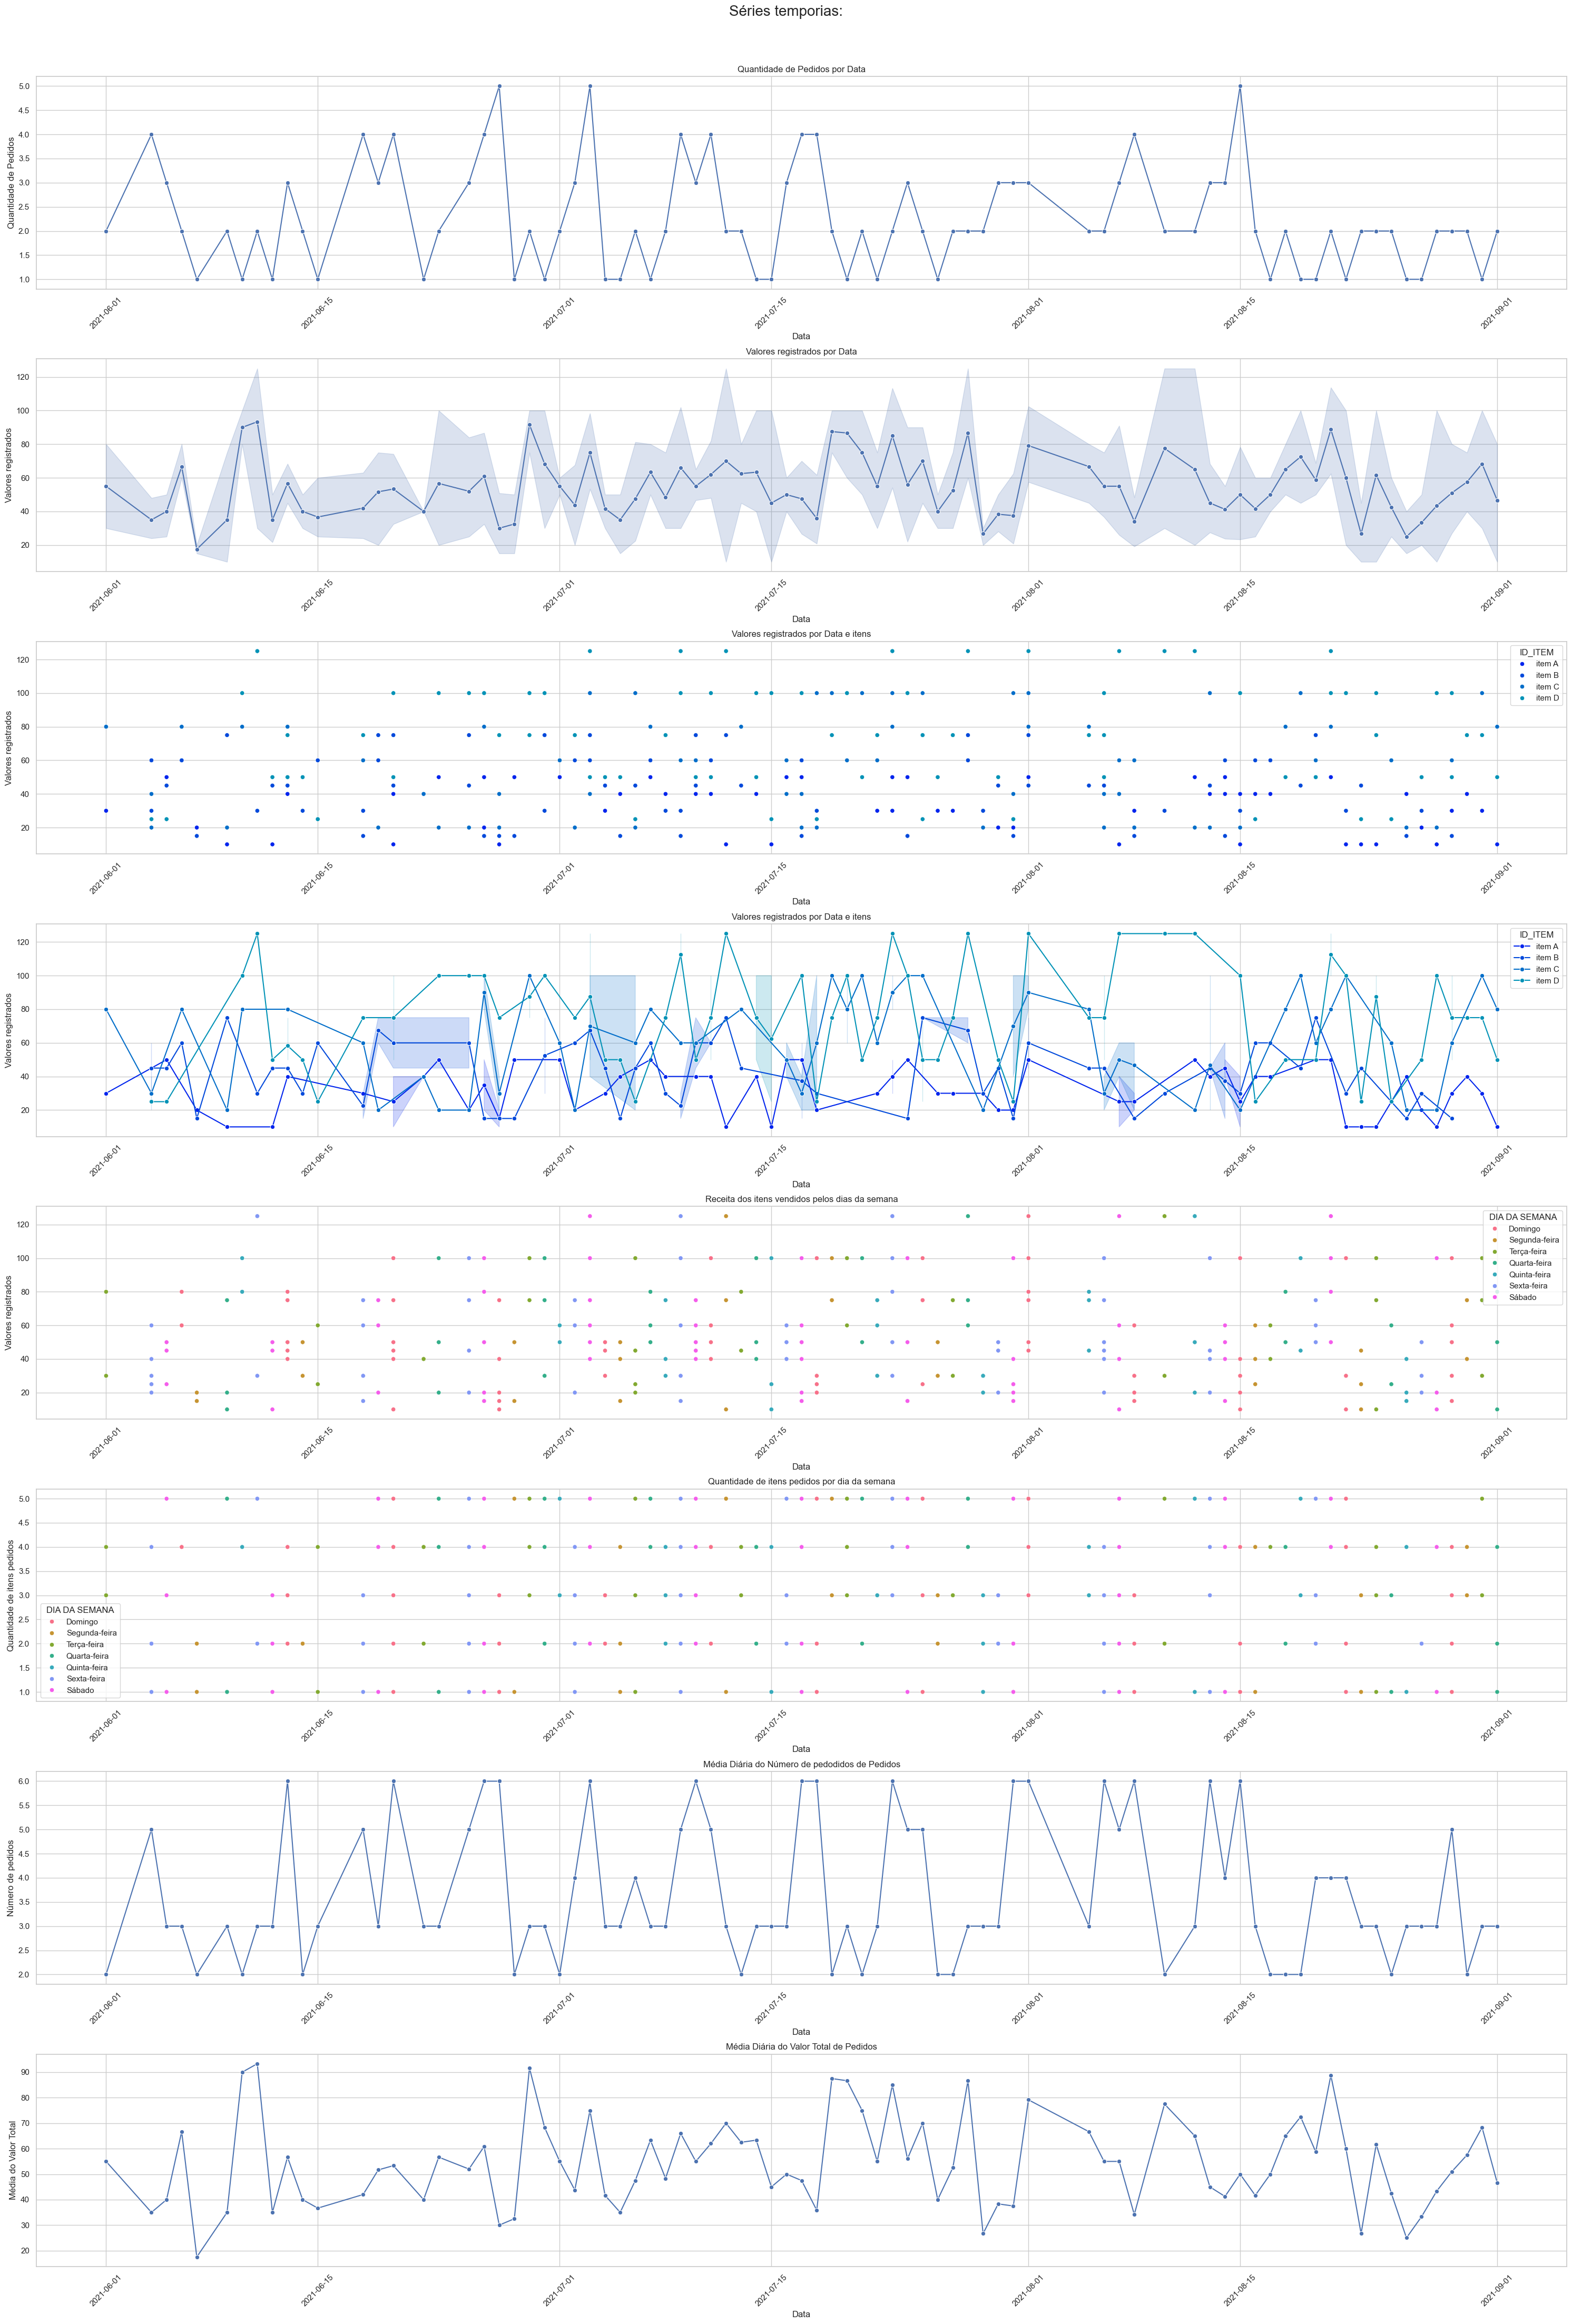

In [274]:
import matplotlib.pyplot as plt
import seaborn as sns

# Agrupando dados
df_pedido = df.groupby(['ID_PEDIDO', 'DATA'])['VALOR_TOTAL'].sum().reset_index().sort_values(by='DATA')
pedidos_por_data = df_pedido.groupby('DATA').size().reset_index(name='Quantidade de Pedidos')

plt.figure(figsize=(30, 45))

# Subplot 1
plt.subplot(8,1,1)
sns.lineplot(x='DATA', y='Quantidade de Pedidos', data=pedidos_por_data, marker='o', color='b')
plt.title('Quantidade de Pedidos por Data')
plt.xlabel('Data')
plt.ylabel('Quantidade de Pedidos')
plt.xticks(rotation=45)
plt.tight_layout()

# Subplot 2
plt.subplot(8,1,2)
sns.lineplot(x='DATA', y='VALOR_TOTAL', data=df, marker='o', color='b')
plt.title('Valores registrados por Data')
plt.xlabel('Data')
plt.ylabel('Valores registrados')
plt.xticks(rotation=45)
plt.tight_layout()

# Subplot 3
plt.subplot(8,1,3)
sns.scatterplot(x='DATA', y='VALOR_TOTAL', data=df, marker='o', color='b', hue='ID_ITEM')
plt.title('Valores registrados por Data e itens')
plt.xlabel('Data')
plt.ylabel('Valores registrados')
plt.xticks(rotation=45)
plt.tight_layout()

# Subplot 4
plt.subplot(8,1,4)
sns.lineplot(x='DATA', y='VALOR_TOTAL', data=df, marker='o', color='b', hue='ID_ITEM')
plt.title('Valores registrados por Data e itens')
plt.xlabel('Data')
plt.ylabel('Valores registrados')
plt.xticks(rotation=45)
plt.tight_layout()

# Subplot 5
plt.subplot(8,1,5)
sns.scatterplot(x='DATA', y='VALOR_TOTAL', data=df, marker='o', color='b', hue='DIA DA SEMANA')
plt.title('Receita dos itens vendidos pelos dias da semana')
plt.xlabel('Data')
plt.ylabel('Valores registrados')
plt.xticks(rotation=45)
plt.tight_layout()

# Subplot 6
plt.subplot(8,1,6)
sns.scatterplot(x='DATA', y='QUANTIDADE', data=df, marker='o', color='b', hue='DIA DA SEMANA')
plt.title('Quantidade de itens pedidos por dia da semana')
plt.xlabel('Data')
plt.ylabel('Quantidade de itens pedidos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.suptitle("Séries temporias:", fontsize=20)


pedidos_por_data = df.groupby('DATA').agg({'VALOR_TOTAL': 'mean', 'ID_PEDIDO': 'count'}).reset_index()
pedidos_por_data.columns = ['DATA', 'MEDIA_VALOR_TOTAL', 'NUM_PEDIDOS']
pedidos_por_data = pedidos_por_data.sort_values(by='DATA').reset_index(drop=True)
plt.subplot(8,1,8)
sns.lineplot(x='DATA', y='MEDIA_VALOR_TOTAL', data=pedidos_por_data, marker='o', color='b')
plt.title('Média Diária do Valor Total de Pedidos')
plt.xlabel('Data')
plt.ylabel('Média do Valor Total')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()


plt.subplot(8,1,7)
sns.lineplot(x='DATA', y='NUM_PEDIDOS', data=pedidos_por_data, marker='o', color='b')
plt.title('Média Diária do Número de pedodidos de Pedidos')
plt.xlabel('Data')
plt.ylabel('Número de pedidos')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()


plt.subplots_adjust(top=0.95)
plt.show()


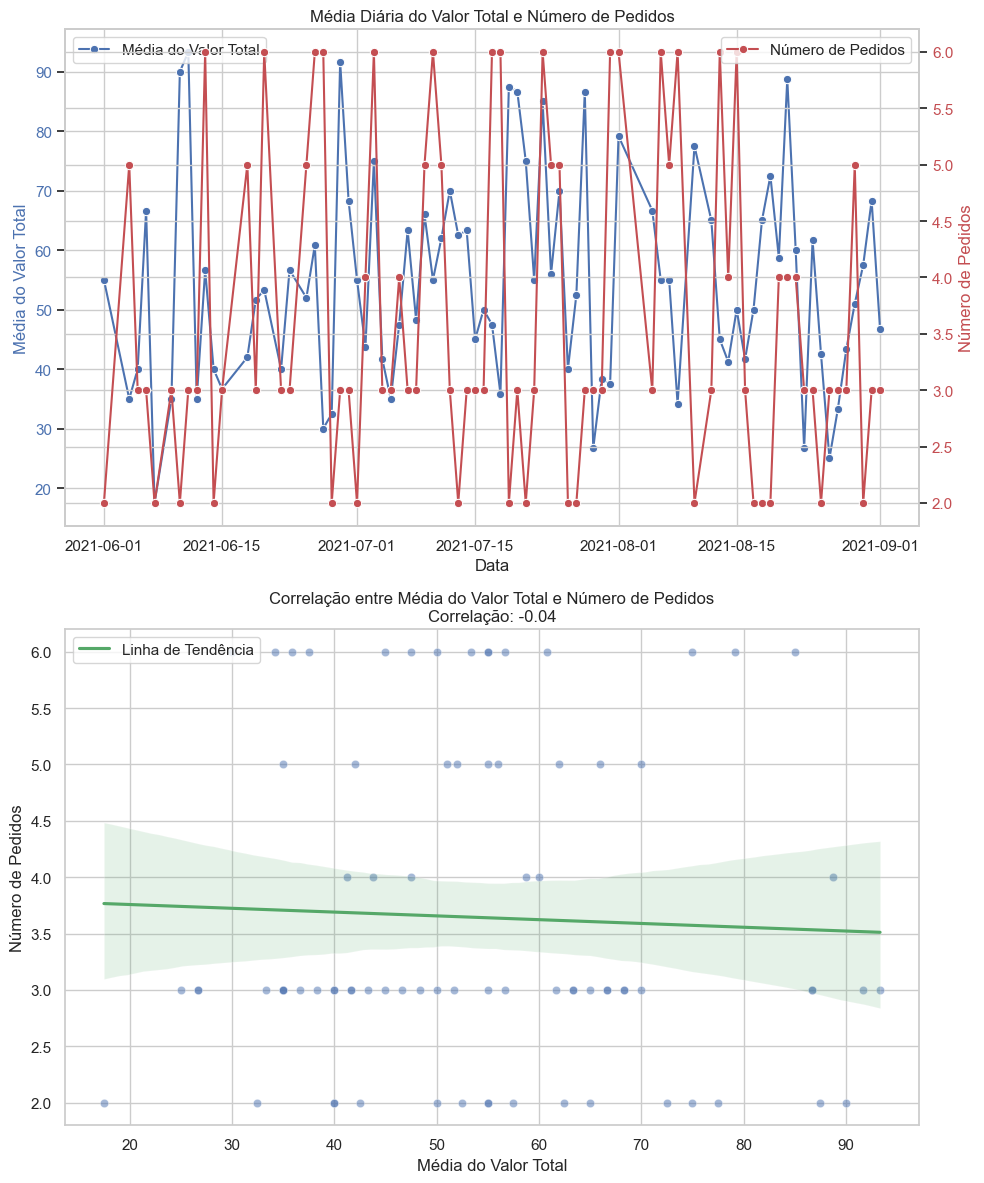

In [282]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seus dados e preparação
pedidos_por_data = df.groupby('DATA').agg({'VALOR_TOTAL': 'mean', 'ID_PEDIDO': 'count'}).reset_index()
pedidos_por_data.columns = ['DATA', 'MEDIA_VALOR_TOTAL', 'NUM_PEDIDOS']
pedidos_por_data = pedidos_por_data.sort_values(by='DATA').reset_index(drop=True)

# Criando o gráfico
plt.figure(figsize=(10, 12))

# Plotando a média diária do valor total de pedidos
plt.subplot(2,1,1)
ax1 = sns.lineplot(x='DATA', y='MEDIA_VALOR_TOTAL', data=pedidos_por_data, marker='o', color='b', label='Média do Valor Total')
ax1.set_xlabel('Data')
ax1.set_ylabel('Média do Valor Total', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.grid(True)
ax2 = ax1.twinx()
sns.lineplot(x='DATA', y='NUM_PEDIDOS', data=pedidos_por_data, marker='o', color='r', ax=ax2, label='Número de Pedidos')
ax2.set_ylabel('Número de Pedidos', color='r')
ax2.tick_params(axis='y', labelcolor='r')
plt.title('Média Diária do Valor Total e Número de Pedidos')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()




correlation = pedidos_por_data['MEDIA_VALOR_TOTAL'].corr(pedidos_por_data['NUM_PEDIDOS'])
rounded_correlation = round(correlation, 2)  # Arredonda para duas casas decimais
correlation_text = f'Correlação: {rounded_correlation}'

# Plotar o gráfico de dispersão com linha de tendência
plt.subplot(2,1,2)
sns.scatterplot(x='MEDIA_VALOR_TOTAL', y='NUM_PEDIDOS', data=pedidos_por_data, color='b', alpha=0.5)
sns.regplot(x='MEDIA_VALOR_TOTAL', y='NUM_PEDIDOS', data=pedidos_por_data, scatter=False, color='g', label='Linha de Tendência')
plt.title('Correlação entre Média do Valor Total e Número de Pedidos\n' + correlation_text)
plt.xlabel('Média do Valor Total')
plt.ylabel('Número de Pedidos')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
plt.show()


In [284]:
df

,ID_PEDIDO,ID_ITEM,QUANTIDADE,PRECO,DATA,VALOR_TOTAL,DIA DA SEMANA,NUMERO DA SEMANA,NUMERO DO MES,MES,DIA_DA_SEMANA_NUM
85,4720210702,item A,2,10,2021-07-02,20,Sexta-feira,26,7,2021-07-02,5
119,6220210710,item A,4,10,2021-07-10,40,Sábado,27,7,2021-07-10,6
213,10820210807,item A,1,10,2021-08-07,10,Sábado,31,8,2021-08-07,6
62,3320210626,item A,2,10,2021-06-26,20,Sábado,25,6,2021-06-26,6
125,6620210711,item A,4,10,2021-07-11,40,Domingo,27,7,2021-07-11,0
...,...,...,...,...,...,...,...,...,...,...,...
117,6020210710,item D,2,25,2021-07-10,50,Sábado,27,7,2021-07-10,6
121,6320210711,item D,4,25,2021-07-11,100,Domingo,27,7,2021-07-11,0
211,10620210806,item D,3,25,2021-08-06,75,Sexta-feira,31,8,2021-08-06,5
225,11520210812,item D,5,25,2021-08-12,125,Quinta-feira,32,8,2021-08-12,4


In [285]:
# Agrupa por DATA e calcula a média do número de pedidos e do VALOR_TOTAL
df_media_diaria = df.groupby('DATA').agg(
    MEDIA_PEDIDOS=('ID_PEDIDO', 'count'),
    MEDIA_VALOR_TOTAL=('VALOR_TOTAL', 'mean')
).reset_index()

display(df_media_diaria)

,DATA,MEDIA_PEDIDOS,MEDIA_VALOR_TOTAL
0,2021-06-01,2,55.000000
1,2021-06-04,5,35.000000
2,2021-06-05,3,40.000000
3,2021-06-06,3,66.666667
4,2021-06-07,2,17.500000
...,...,...,...
76,2021-08-28,3,43.333333
77,2021-08-29,5,51.000000
78,2021-08-30,2,57.500000
79,2021-08-31,3,68.333333


In [287]:
from statsmodels.tsa.stattools import adfuller, kpss

def test_stationarity(series):
    # ADF Test
    adf_result = adfuller(series)
    adf_output = {
        'ADF Statistic': adf_result[0],
        'p-value': adf_result[1],
        'Critical Values': adf_result[4]
    }
    
    # KPSS Test
    kpss_result = kpss(series, regression='c')
    kpss_output = {
        'KPSS Statistic': kpss_result[0],
        'p-value': kpss_result[1],
        'Critical Values': kpss_result[3]
    }
    
    return adf_output, kpss_output

# Realizar os testes para MEDIA_PEDIDOS
adf_media_pedidos, kpss_media_pedidos = test_stationarity(df_media_diaria['MEDIA_PEDIDOS'])

# Realizar os testes para MEDIA_VALOR_TOTAL
adf_media_valor_total, kpss_media_valor_total = test_stationarity(df_media_diaria['MEDIA_VALOR_TOTAL'])

(adf_media_pedidos, kpss_media_pedidos), (adf_media_valor_total, kpss_media_valor_total)

/var/folders/gj/tzd3lx9s2rx7vzm6v94rp4zw0000gn/T/ipykernel_71712/1985391208.py:13: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.


/var/folders/gj/tzd3lx9s2rx7vzm6v94rp4zw0000gn/T/ipykernel_71712/1985391208.py:13: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.




(({'ADF Statistic': np.float64(-3.1307791495084376),
   'p-value': np.float64(0.024357668068151005),
   'Critical Values': {'1%': np.float64(-3.528889992207215),
    '5%': np.float64(-2.9044395987933362),
    '10%': np.float64(-2.589655654274312)}},
  {'KPSS Statistic': np.float64(0.10870713569492269),
   'p-value': np.float64(0.1),
   'Critical Values': {'10%': 0.347,
    '5%': 0.463,
    '2.5%': 0.574,
    '1%': 0.739}}),
 ({'ADF Statistic': np.float64(-7.842824450974894),
   'p-value': np.float64(5.874841247806051e-12),
   'Critical Values': {'1%': np.float64(-3.5148692050781247),
    '5%': np.float64(-2.8984085156250003),
    '10%': np.float64(-2.58643890625)}},
  {'KPSS Statistic': np.float64(0.12536151159374842),
   'p-value': np.float64(0.1),
   'Critical Values': {'10%': 0.347,
    '5%': 0.463,
    '2.5%': 0.574,
    '1%': 0.739}}))

In [288]:
# Função para realizar os testes ADF e KPSS
def test_stationarity(series):
    adf_result = adfuller(series)
    adf_stationary = adf_result[1] < 0.05  # True if p-value < 0.05
    kpss_result = kpss(series, regression='c')
    kpss_stationary = kpss_result[1] > 0.05  # True if p-value > 0.05
    return adf_stationary, kpss_stationary

adf_media_pedidos, kpss_media_pedidos = test_stationarity(df_media_diaria['MEDIA_PEDIDOS'])
adf_media_valor_total, kpss_media_valor_total = test_stationarity(df_media_diaria['MEDIA_VALOR_TOTAL'])
results = {
    'Series': ['MEDIA_PEDIDOS', 'MEDIA_VALOR_TOTAL'],
    'ADF_Stationary': [adf_media_pedidos, adf_media_valor_total],
    'KPSS_Stationary': [kpss_media_pedidos, kpss_media_valor_total]
}
df_results = pd.DataFrame(results)
print(df_results)

              Series  ADF_Stationary  KPSS_Stationary
0      MEDIA_PEDIDOS            True             True
1  MEDIA_VALOR_TOTAL            True             True


/var/folders/gj/tzd3lx9s2rx7vzm6v94rp4zw0000gn/T/ipykernel_71712/277534398.py:8: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.


/var/folders/gj/tzd3lx9s2rx7vzm6v94rp4zw0000gn/T/ipykernel_71712/277534398.py:8: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.




In [286]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller, kpss

def adf_test(series, title=''):
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(), autolag='AIC')
    labels = ['ADF Test Statistic', 'p-value', '# Lags Used', '# Observations Used']
    out = pd.Series(result[0:4], index=labels)
    for key, value in result[4].items():
        out[f'Critical Value ({key})'] = value
    print(out.to_string())
    if result[1] <= 0.05:
        print("=> Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("=> Weak evidence against the null hypothesis, fail to reject the null hypothesis. Data has a unit root and is non-stationary")

# Função para executar o teste KPSS
def kpss_test(series, title=''):
    print(f'KPSS Test: {title}')
    result = kpss(series.dropna(), regression='c')
    labels = ['KPSS Test Statistic', 'p-value', '# Lags Used']
    out = pd.Series(result[0:3], index=labels)
    for key, value in result[3].items():
        out[f'Critical Value ({key})'] = value
    print(out.to_string())
    if result[1] <= 0.05:
        print("=> Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("=> Weak evidence against the null hypothesis, fail to reject the null hypothesis. Data has a unit root and is non-stationary")

# Executar os testes
print("MEDIA_PEDIDOS")
adf_test(df_media_diaria['MEDIA_PEDIDOS'], title='MEDIA_PEDIDOS')
kpss_test(df_media_diaria['MEDIA_PEDIDOS'], title='MEDIA_PEDIDOS')

print("\nMEDIA_VALOR_TOTAL")
adf_test(df_media_diaria['MEDIA_VALOR_TOTAL'], title='MEDIA_VALOR_TOTAL')
kpss_test(df_media_diaria['MEDIA_VALOR_TOTAL'], title='MEDIA_VALOR_TOTAL')

MEDIA_PEDIDOS
Augmented Dickey-Fuller Test: MEDIA_PEDIDOS
ADF Test Statistic      -3.130779
p-value                  0.024358
# Lags Used             11.000000
# Observations Used     69.000000
Critical Value (1%)     -3.528890
Critical Value (5%)     -2.904440
Critical Value (10%)    -2.589656
=> Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary
KPSS Test: MEDIA_PEDIDOS
KPSS Test Statistic      0.108707
p-value                  0.100000
# Lags Used              0.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
=> Weak evidence against the null hypothesis, fail to reject the null hypothesis. Data has a unit root and is non-stationary

MEDIA_VALOR_TOTAL
Augmented Dickey-Fuller Test: MEDIA_VALOR_TOTAL
ADF Test Statistic     -7.842824e+00
p-value                 5.874841e-12
# Lags Used             0.000000e+00
# Observations Used   

/var/folders/gj/tzd3lx9s2rx7vzm6v94rp4zw0000gn/T/ipykernel_71712/3439163807.py:21: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.


/var/folders/gj/tzd3lx9s2rx7vzm6v94rp4zw0000gn/T/ipykernel_71712/3439163807.py:21: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.




,Combinação de Itens,Quantidade de Pedidos
0,"(item B, item D)",28
1,"(item A, item C)",27
2,"(item C, item D)",26
3,"(item B, item C)",22
4,"(item A, item D)",22


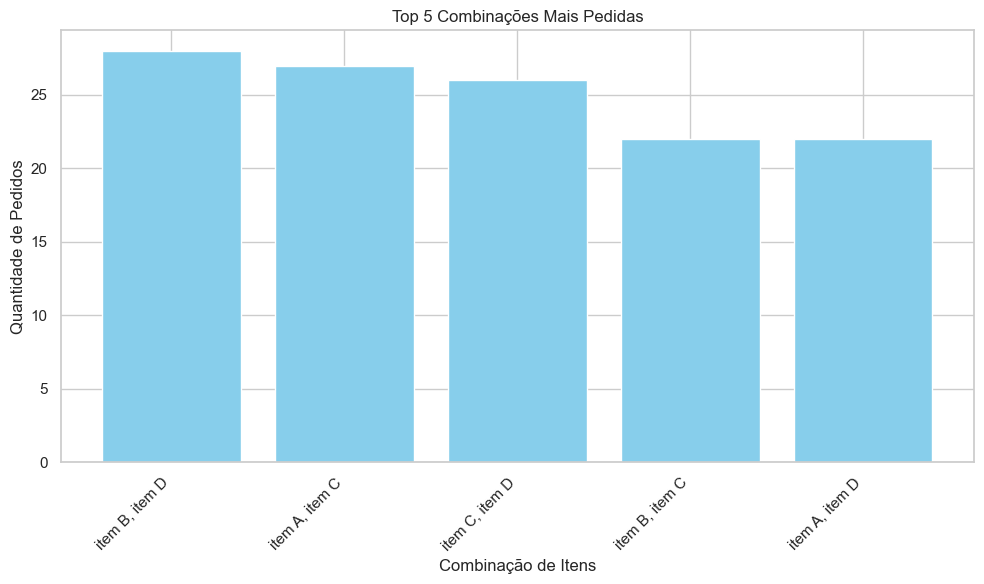

In [256]:
import pandas as pd
import matplotlib.pyplot as plt
from itertools import combinations


# Função para gerar todas as combinações de itens em cada pedido
def find_combinations(items):
    combos = []
    for r in range(2, len(items) + 1):
        combos.extend(combinations(sorted(items), r))
    return combos

# Aplicando a função para encontrar combinações de itens em cada pedido
combinacoes = df.groupby('ID_PEDIDO')['ID_ITEM'].apply(find_combinations).explode().reset_index()
combinacoes.columns = ['ID_PEDIDO', 'Combinação de Itens']

# Contando as ocorrências de cada combinação
contagem_combinacoes = combinacoes['Combinação de Itens'].value_counts().reset_index()
contagem_combinacoes.columns = ['Combinação de Itens', 'Quantidade de Pedidos']

# Selecionando as top 5 combinações mais pedidas
top_combinacoes = contagem_combinacoes.head(5)

display(top_combinacoes)

# Convertendo as combinações de itens de tuplas para strings usando .loc
top_combinacoes.loc[:, 'Combinação de Itens'] = top_combinacoes['Combinação de Itens'].apply(lambda x: ', '.join(x))

# Plotando o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(top_combinacoes['Combinação de Itens'], top_combinacoes['Quantidade de Pedidos'], color='skyblue')
plt.xlabel('Combinação de Itens')
plt.ylabel('Quantidade de Pedidos')
plt.title('Top 5 Combinações Mais Pedidas')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### Com uma função estacionária, você pode realizar uma série de estudos e análises, aproveitando as propriedades dessa função. Aqui estão alguns estudos e análises comuns que podem ser feitos com uma função estacionária:

### Previsão de Séries Temporais: Funções estacionárias são mais fáceis de prever porque suas propriedades estatísticas não mudam ao longo do tempo. Modelos como ARIMA (AutoRegressive Integrated Moving Average) são frequentemente usados para previsão de séries temporais estacionárias.

### Análise de Correlação e Causalidade: Com séries temporais estacionárias, você pode analisar a correlação entre diferentes séries temporais para entender relações e potenciais causalidades. Testes como o de Granger são frequentemente usados para analisar causalidade.

### Análise de Espectro de Frequência: A análise de Fourier pode ser usada para decompor uma função estacionária em componentes de frequência, o que é útil para identificar ciclos ou padrões repetitivos na série temporal.

### Modelagem e Ajuste de Modelos: Modelos estatísticos e econométricos, como ARMA (AutoRegressive Moving Average) e GARCH (Generalized Autoregressive Conditional Heteroskedasticity), são usados para modelar séries temporais estacionárias.

### Detecção de Anomalias: Em séries temporais estacionárias, é mais fácil identificar pontos que se desviam do comportamento esperado (anomalias), pois as propriedades da série são consistentes ao longo do tempo.

### Teste de Hipóteses: Você pode realizar vários testes de hipóteses sobre a média, variância e outras propriedades estatísticas da função estacionária. Testes comuns incluem o teste de Dickey-Fuller aumentado (ADF) e o teste KPSS para confirmar a estacionaridade.

### Análise de Volatilidade: Em finanças, funções estacionárias são frequentemente usadas para analisar a volatilidade dos preços dos ativos ao longo do tempo. Modelos como GARCH são particularmente úteis para isso.

### Identificação de Regimes: Em econometria, você pode usar métodos como a modelagem de mudança de regime para identificar diferentes regimes ou estados dentro de uma série temporal estacionária.

### Cada um desses estudos pode fornecer insights valiosos dependendo do contexto e dos dados específicos com os quais você está trabalhando.

Análise de Variância (ANOVA): Para comparar as médias de vendas entre diferentes dias da semana ou meses, para ver se há diferenças estatisticamente significativas nas vendas médias entre esses períodos.

Testes de sazonalidade: Se desejar verificar se há padrões sazonais claros nas vendas, você pode usar métodos como decomposição sazonal ou testes específicos de sazonalidade.